## 6.5　ハイパーパラメータの検証

In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt

In [2]:
sys.path.append('../input/deeplearningfromscratchmaster/deep-learning-from-scratch-master')

In [3]:
from common.util import shuffle_dataset
from common.multi_layer_net import MultiLayerNet
from common.trainer import Trainer

### 6.5.1　検証データ

In [4]:
x_train = np.load('../input/load-mnist/load_mnist/normalize=True, one_hot_label=True/x_train.npy')
t_train = np.load('../input/load-mnist/load_mnist/normalize=True, one_hot_label=True/t_train.npy')
x_test = np.load('../input/load-mnist/load_mnist/normalize=True, one_hot_label=True/x_test.npy')
t_test = np.load('../input/load-mnist/load_mnist/normalize=True, one_hot_label=True/t_test.npy')

print(x_train.shape)
print(t_train.shape)
print(x_test.shape)
print(t_test.shape)

(60000, 784)
(60000, 10)
(10000, 784)
(10000, 10)


In [5]:
x_train, t_train = shuffle_dataset(x_train, t_train)

In [6]:
validation_rate = 0.20
validation_num = int(x_train.shape[0] * validation_rate)

In [7]:
x_val = x_train[:validation_num]
t_val = t_train[:validation_num]
x_train = x_train[validation_num:]
t_train = t_train[validation_num:]

print(x_val.shape)
print(t_val.shape)
print(x_train.shape)
print(t_train.shape)

(12000, 784)
(12000, 10)
(48000, 784)
(48000, 10)


### 6.5.3　ハイパーパラメータ最適化の実装

In [8]:
weight_decay = 10 ** np.random.uniform(-8, -4)
lr = 10 ** np.random.uniform(-6, -2)

print(weight_decay)
print(lr)

1.9183382145685893e-05
0.003689579136254875


In [9]:
def __train(lr, weight_decay, epocs=50):
    
    network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100],
                            output_size=10, weight_decay_lambda=weight_decay)
    
    trainer = Trainer(network, x_train, t_train, x_val, t_val,
                      epochs=epocs, mini_batch_size=100, optimizer='sgd', optimizer_param={'lr': lr}, verbose=False)
    
    trainer.train()
    
    return trainer.test_acc_list, trainer.train_acc_list

In [10]:
optimization_trial = 100
results_val = {}
results_train = {}

In [11]:
for _ in range(optimization_trial):
    weight_decay = 10 ** np.random.uniform(-8, -4)
    lr = 10 ** np.random.uniform(-6, -2)
    
    val_acc_list, train_acc_list = __train(lr, weight_decay)
    print('val acc:' + str(val_acc_list[-1]) + ' | lr:' + str(lr) + ', weight_decay:' + str(weight_decay))
    key = 'lr:' + str(lr) + ', weight_decay:' + str(weight_decay)
    results_val[key] = val_acc_list
    results_train[key] = train_acc_list

val acc:0.968 | lr:0.006249074420512526, weight_decay:4.877287101321547e-05
val acc:0.95825 | lr:0.0019158996690496885, weight_decay:2.215825786058933e-07
val acc:0.23775 | lr:1.971199910717417e-05, weight_decay:1.1047508518229781e-08
val acc:0.93975 | lr:0.0006378184001840894, weight_decay:2.6672915668632655e-05
val acc:0.28591666666666665 | lr:1.3394686696818414e-05, weight_decay:8.512463655632525e-08
val acc:0.3586666666666667 | lr:1.5513008258638167e-05, weight_decay:1.149592348972823e-05
val acc:0.1475 | lr:2.6436674995889926e-06, weight_decay:1.1647789628349288e-08
val acc:0.9416666666666667 | lr:0.0009716785435394211, weight_decay:1.3594598304742329e-05
val acc:0.9071666666666667 | lr:0.000254739634921114, weight_decay:1.1576435272343954e-06
val acc:0.9079166666666667 | lr:0.0002901446379631483, weight_decay:6.472191844241184e-08
val acc:0.34675 | lr:1.6011870956492274e-05, weight_decay:1.9871862500478387e-07
val acc:0.968 | lr:0.005659513955718125, weight_decay:1.71579961603953

ハイパーパラメータ `lr` と `weight_decay` を調整した後で、そのパラメータを使って学習（勾配降下法）を行い、最適な重みを求める。

=========== Hyper-Parameter Optimization Result ===========
Best-1(val acc:0.9701666666666666) | lr:0.009822978243315855, weight_decay:2.438789158942195e-08
Best-2(val acc:0.9694166666666667) | lr:0.00784047724849917, weight_decay:1.483956397150027e-07
Best-3(val acc:0.96925) | lr:0.005401272355527609, weight_decay:7.526568688550566e-07
Best-4(val acc:0.9685833333333334) | lr:0.007660103011403785, weight_decay:5.027012941626552e-07
Best-5(val acc:0.968) | lr:0.006249074420512526, weight_decay:4.877287101321547e-05
Best-6(val acc:0.968) | lr:0.005659513955718125, weight_decay:1.7157996160395392e-08
Best-7(val acc:0.96775) | lr:0.005134048335039966, weight_decay:3.577030557726823e-07
Best-8(val acc:0.96775) | lr:0.008354140504854177, weight_decay:1.5830832516599464e-07
Best-9(val acc:0.9670833333333333) | lr:0.00712391193787763, weight_decay:5.947245814405421e-07
Best-10(val acc:0.967) | lr:0.006851653577291233, weight_decay:3.14886030765377e-06
Best-11(val acc:0.96675) | lr:0.0041400335

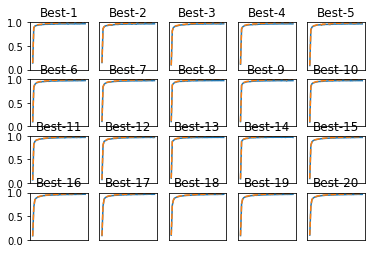

In [12]:
print('=========== Hyper-Parameter Optimization Result ===========')
graph_draw_num = 20
col_num = 5
row_num = int(np.ceil(graph_draw_num / col_num))
i = 0

for key, val_acc_list in sorted(results_val.items(), key=lambda x:x[1][-1], reverse=True):
    print('Best-' + str(i+1) + '(val acc:' + str(val_acc_list[-1]) + ') | ' + key)

    plt.subplot(row_num, col_num, i+1)
    plt.title('Best-' + str(i+1))
    plt.ylim(0.0, 1.0)
    if i % 5: plt.yticks([])
    plt.xticks([])
    x = np.arange(len(val_acc_list))
    plt.plot(x, val_acc_list)
    plt.plot(x, results_train[key], '--')
    i += 1

    if i >= graph_draw_num:
        break

plt.show()